# Random Forest Classification

## Libraries Loading

In [13]:
library(tidyverse)
library(ggplot2)
library(randomForest)
library(caret)

## Data loading

In [2]:
data <- read_csv('../00_data/Social_Network_Ads.csv')
head(data)

Rows: 400 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): Age, EstimatedSalary, Purchased

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,EstimatedSalary,Purchased
<dbl>,<dbl>,<dbl>
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0


In [3]:
# data structure
glimpse(data)

Rows: 400
Columns: 3
$ Age             <dbl> 19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 32…
$ EstimatedSalary <dbl> 19000, 20000, 43000, 57000, 76000, 58000, 84000, 15000…
$ Purchased       <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, …


In [4]:
data <- data |>
        mutate(Purchased = factor(data$Purchased, levels = c(0, 1), labels = c('No', 'Yes')))

In [5]:
glimpse(data)

Rows: 400
Columns: 3
$ Age             <dbl> 19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20, 32…
$ EstimatedSalary <dbl> 19000, 20000, 43000, 57000, 76000, 58000, 84000, 15000…
$ Purchased       <fct> No, No, No, No, No, No, No, Yes, No, No, No, No, No, N…


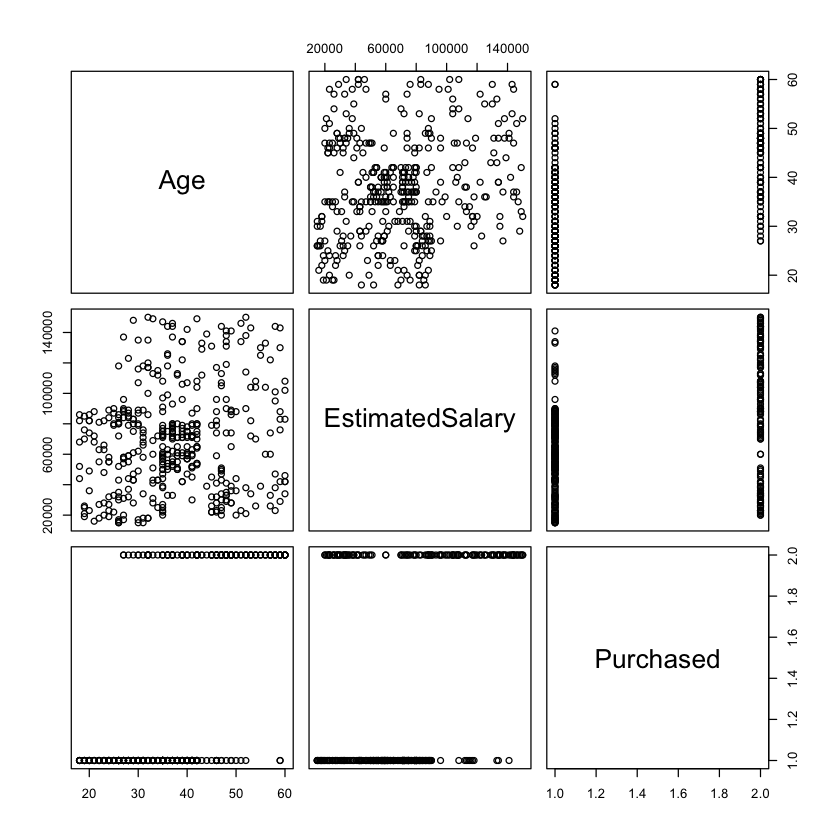

In [6]:
pairs(data)

# Splitting data into training and test set

In [7]:
set.seed(42)

train_data <- data |> slice_sample(prop = 0.8)
test_data <- data |> anti_join(train_data)

Joining with `by = join_by(Age, EstimatedSalary, Purchased)`


## Feature scaling

> **Note!** You do not need to scale the features for random forest classification models.

## Fit the model

In [8]:
fit <- randomForest(Purchased ~ .,
            data = train_data, 
            ntree = 100)

## Predicting the test set

In [9]:
y_pred <- predict(fit, newdata=test_data)
head(y_pred)

1   2   3   4   5   6 
Yes  No Yes Yes Yes  No 
Levels: No Yes

## Model Performance

### Confusion Matrix

In [10]:
cm <- table(test_data$Purchased, y_pred)
print(cm)

     y_pred
      No Yes
  No  34   1
  Yes  3  27


### Accuracy Score

In [11]:
accuracy <- mean(test_data$Purchased == y_pred)
print(paste0('Accuracy on test set: ', round(accuracy*100, 2), "%"))

[1] "Accuracy on test set: 93.85%"


## Viz the Data

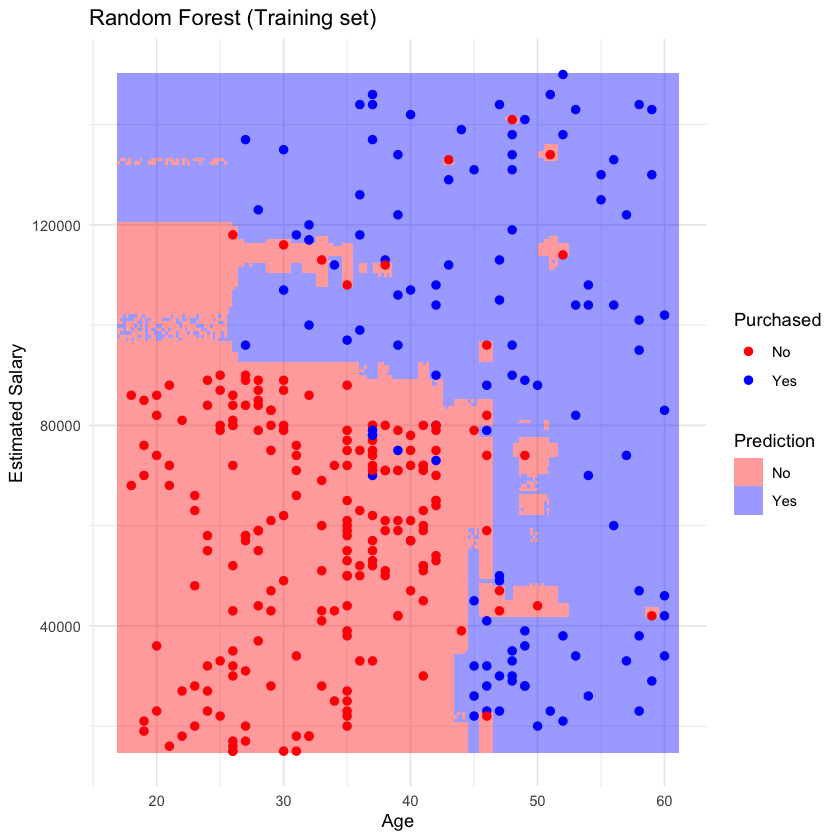

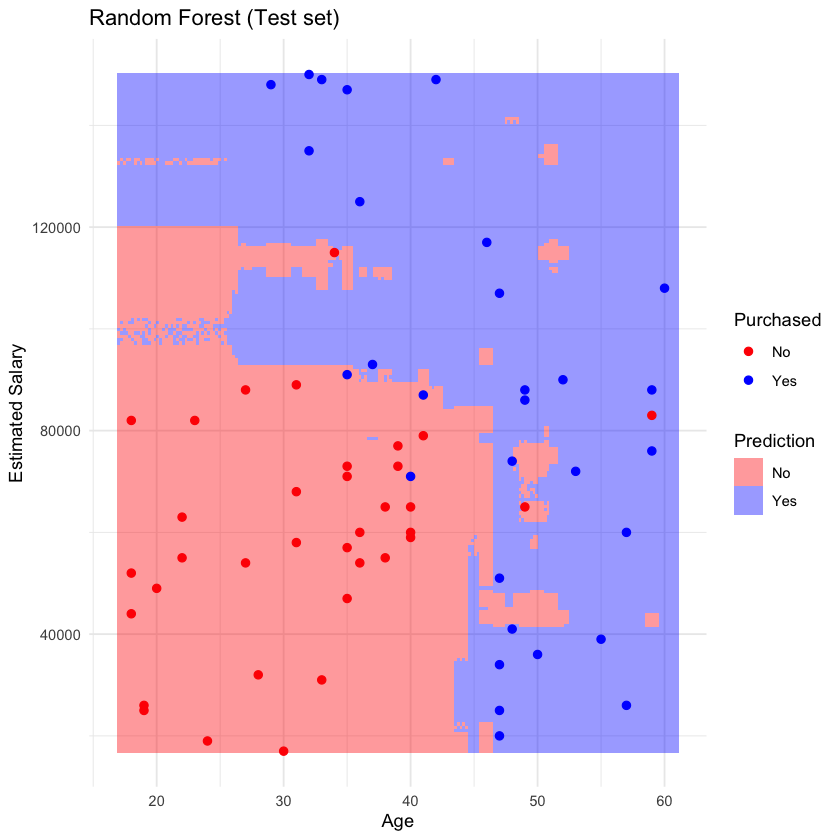

In [12]:
tree_pred_boundary <- function(model, df_test, name){
        X1 <- seq(min(df_test$Age) - 1, max(df_test$Age) + 1, length.out = 200)
        X2 <- seq(min(df_test$EstimatedSalary) - 1, max(df_test$EstimatedSalary) + 1, length.out = 200)
        grid <- expand.grid(X1, X2)
        colnames(grid) <- c('Age', 'EstimatedSalary')
        grid$Prediction <- predict(model, newdata = grid, type = 'class')
        
        print(ggplot() +
            geom_tile(data=grid, aes(x = Age, y = EstimatedSalary, fill = Prediction), alpha=0.4) +
            geom_point(df_test, mapping=aes(x = Age, y = EstimatedSalary, colour = Purchased), size=2) +
            scale_fill_manual(values = c("red", "blue"), name = "Prediction") +
            scale_color_manual(values = c("red", "blue"), name = "Purchased") +
            labs(title = paste0("Random Forest (", name, ")"), x = "Age", y = "Estimated Salary") +
            theme_minimal())
    }
    
tree_pred_boundary(fit, train_data, 'Training set')
tree_pred_boundary(fit, test_data, 'Test set')